### Problem: Predict whether a student gets admitted into a university based on result of two exams.

## Importing

In [1]:
# Standard imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Reading data off csv
data = pd.read_csv('./ex2data1.txt')

In [3]:

data.head()

,Subject1,Subject2,Admission
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


In [4]:
data.describe()

,Subject1,Subject2,Admission
count,100.000000,100.000000,100.000000
mean,65.644274,66.221998,0.600000
std,19.458222,18.582783,0.492366
min,30.058822,30.603263,0.000000
25%,50.919511,48.179205,0.000000
50%,67.032988,67.682381,1.000000
75%,80.212529,79.360605,1.000000
max,99.827858,98.869436,1.000000


## Plotting

In [5]:
# Seperating students according to label to plot
admitted = data[data["Admission"]==1]
not_admitted = data[data["Admission"]==0]

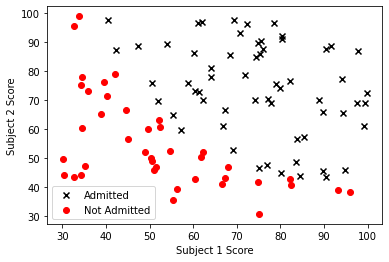

In [6]:
# Plotting 
plt.scatter(admitted['Subject1'], admitted['Subject2'], marker='x', color='black', label="Admitted")
plt.scatter(not_admitted['Subject1'], not_admitted['Subject2'], marker='o', color='red', label="Not Admitted")
plt.xlabel("Subject 1 Score")
plt.ylabel("Subject 2 Score")
plt.legend();

## Setting up label and features

In [7]:
# Setting up label
y = data['Admission']
y.head()

0    0
1    0
2    0
3    1
4    1
Name: Admission, dtype: int64

In [8]:
# Number of training examples
m = len(y)


# Creating dataframe full of ones as dummy feature to  fit our hypothesis
ones = pd.DataFrame(np.ones((m,1)))
ones.head()

X = data.drop('Admission', axis=1)
# Adding a column of ones as feature
X.insert(0, "ones", ones)
X.head()


,ones,Subject1,Subject2
0,1.0,34.623660,78.024693
1,1.0,30.286711,43.894998
2,1.0,35.847409,72.902198
3,1.0,60.182599,86.308552
4,1.0,79.032736,75.344376


In [9]:
# Number of Features
n = len(X.columns)

In [10]:
# Initial parameters/guess
initial_theta = np.zeros(3)
initial_theta

array([0., 0., 0.])

## Hypothesis

$h_{\Theta}(x) = g(\Theta^{T}x)$

$g(z) = \frac{1}{1 + e^{-z}}$

$h_{\Theta}(x) = \frac{1}{1 + e^{-\Theta^{T}x}}$


In [11]:
# Function to calculate g(z) as shown above
def sigmoid(n):
    # If it is a number
    try:
        len(n)
    except TypeError:
        return (1 / (1 + np.exp(-n)))    
        
    
    # If it is a list
    else:
        
        # If it is a vector
        if np.ndim(n) == 1:
            row = len(n)
            # Make vector of same row
            new_arr = [None] * row
            
            for i in range(row):
                new_arr[i] = sigmoid(n[i])
            return new_arr
            
        # If it is a matrix
        elif np.ndim(n) == 2:
            row = len(n)
            col = len(n[0])
            # Make matrix of same row and col
            new_arr = [[None] * row for _ in range(col)] 
            
            for i in range(row):
                for j in range(col):
                    new_arr[i][j] = sigmoid(n[i][j])
                    
            return new_arr

In [12]:
# Testing the function
print(sigmoid([-10000,0,10000]))
print(sigmoid([
    [-100,-50,-25],
    [-10, 0, 10],
    [25, 50, 100]
]))

[0.0, 0.5, 1.0]
[[3.7200759760208356e-44, 1.928749847963918e-22, 1.3887943864771144e-11], [4.5397868702434395e-05, 0.5, 0.9999546021312976], [0.999999999986112, 1.0, 1.0]]


<ipython-input-11-0c598e286111>:7: RuntimeWarning: overflow encountered in exp
  return (1 / (1 + np.exp(-n)))


## Cost Function

$J(\theta) = \frac{1}{m} \sum_{i=1}^{m}[-y \log(h_{\theta}(x)) - (1-y)\log(1-h_{\theta}(x))]$



In [13]:

    
def costFunction(theta, X, y):
    
    m = len(y)                                    # Number of training examples    
    J = 0                                         # Cost Function  
    
    # Left part of the equation inside the summation
    left = -np.transpose(y).dot(np.log(np.array(sigmoid(X.dot(theta)))))
    # Right part of the equation inside the summation
    right = np.transpose(1-y).dot(np.log(1-np.array(sigmoid(X.dot(theta)))))
    
    J = (1./m) * (left - right)   

    
    return J



In [14]:
costFunction(initial_theta,X ,y)

0.6931471805599452

## Gradient Descent

$\theta_{j} := \theta_{j} - \alpha \frac{\partial J(\theta)}{\partial \theta_{j}}$


$\frac{\partial J(\theta)}{\partial \theta_{j}} = \frac{1}{m}\sum_{i=1}^{m}(h_{\theta}(x)-y)x_{j}$



In [17]:
def gradientDescent(X, y, theta, alpha, num_iters):
    
    
    m = len(y)                                      # Number of examples
    n = len(theta)                                  # Number of features
    new_theta = np.zeros(n)                         # Intilializing new array to store value of theta
    
    for i in range(num_iters):                      # Iterating through steps
        for j in range(n):                          # Iterating through thetas
            h = sigmoid(X.dot(theta.T))             # Hyopthesis
            delta = h - y                           # Difference between prediction and actual value
            sumdelta = delta.T.dot(X.iloc[:, j])    # Sum of all differences
            
            new_theta[j] = theta[j] - (alpha * (1/m) * sumdelta)  # Taking a step/descent

        theta = new_theta                           # Changing value of thetas for next step
        # print(costFunction(theta, X, y))
        
    return theta

In [18]:
gradientDescent(X, y, initial_theta, 0.001, 1000)

array([-0.06946312,  0.0109105 ,  0.00098907])

#### In Gradient Descent, after 1000 iterations with learning rate 0.001, the cost function has barely decreased.
#### The outcome of this algorithm is ([-0.06946312,  0.0109105 ,  0.00098907])

## Newton Descent

### $\theta_{j} := \theta_{j} - \frac{J^{'}(\theta)}{J^{''}(\theta)}$

### $\theta_{j} := \theta_{j} - \frac{\sum_{i=1}^{m}(h_{\theta}(x)-y) x_{j}}{\sum_{i=1}^{m}(h_{\theta}(x))^{2}. e^{-\theta^{T}x}.(x_{j})^{2}} $

$\theta^{T}x = x_{0}\theta_{0} + x_{1}\theta_{1} + ... + x_{n}\theta_{n}$

In [19]:
def newtonDescent(X, y, theta, max_iters):
    
    m = len(y)                                                   # Number of examples
    n = len(theta)                                               # Number of features
    new_theta = np.zeros(n)                                      # Intilializing new array to store value of theta
    
    for i in range(max_iters):                                   # Iterating through steps
        for j in range(n):                                       # Iterating through thetas
            h = sigmoid(X.dot(theta.T))                          # Hypothesis
            delta1 = h - y                                       # Difference between predicted value and actual value
            single_der = delta1.T.dot(X.iloc[:, j])              # Value of first derivative of cost function
            
            delta2 = np.exp(-(X.dot(theta.T))) * np.square(sigmoid(X.dot(theta.T))) 
            double_der = delta2.T.dot(np.square(X.iloc[:, j]))   # Value of second derivative of cost function
            
            new_theta[j] = theta[j] - (single_der/double_der)    # Newton's Optimization
        theta = new_theta                                        # Changing value of thetas for next step
        # print(costFunction(theta, X, y))
    return theta

In [20]:
theta = newtonDescent(X,y,initial_theta,1000)
theta

array([-25.13285341,   0.20600893,   0.20123665])

#### Whereas in Newton's optimization method, we can see that the cost function has converged within 1000 iterations.
#### The outcome of this algorithm is ([-25.13285341,   0.20600893,   0.20123665])

## Testing Accuracy

In [21]:
def predict(X, theta):
    # Setting up new array to store prediction
    predicted = np.zeros(len(X))           
    
    # Looping through each features
    for i in range(len(X)):
        
        # Hypothesis
        chance = sigmoid(theta[0]*X['ones'][i] + theta[1] * X['Subject1'][i] + theta[2] * X['Subject2'][i])
        
        # Saying if the chance is more than 50% the student will get admission
        predicted[i] = 1 if chance >= .5 else 0
        
    return predicted

In [22]:
predicted = predict(X, theta)


In [23]:
def get_accuracy(predicted, actual):
    # Number of correct guesses
    correct = 0
    for i in range(len(actual)):
        if predicted[i] == actual[i]:
            correct += 1
    # Returning percetage
    return correct/len(actual) * 100

In [24]:
get_accuracy(predicted, y)

89.0

### This model in 89% accurate.

A student who gets 45 marks in first subject and 85 in second subject has 77% for admission.

In [25]:
chance = sigmoid(theta[0] + theta[1] * 45 + theta[2] * 85) * 100
chance

77.60273202633599

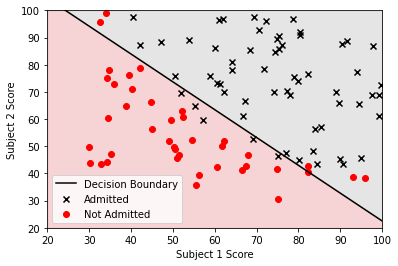

In [26]:
admitted = data[data["Admission"]==1]
not_admitted = data[data["Admission"]==0]


xmin, xmax = 20, 100
ymin, ymax = 20, 100

b = theta[0]
x1, x2 = theta[1], theta[2]

# y-intercept
c = -b/x2
# slope
m = -x1/x2

# Setting xmin and xmax
xd = np.array([xmin, xmax])
# Calculation y using y = mx + c
yd = m*xd + c

# Plotting those two points
plt.plot(xd, yd, 'k', label="Decision Boundary")

# Filling everything below the line red
plt.fill_between(xd, yd, ymin, color='tab:red', alpha=0.2)
# Filling everything below the line gray
plt.fill_between(xd, yd, ymax, color='tab:gray', alpha=0.2)

# Plotting admitted and not admitted students
plt.scatter(admitted['Subject1'], admitted['Subject2'], marker='x', color='black', label="Admitted")
plt.scatter(not_admitted['Subject1'], not_admitted['Subject2'], marker='o', color='red', label="Not Admitted")

# Setting labels
plt.xlabel("Subject 1 Score")
plt.ylabel("Subject 2 Score")

# Setting range of x-intercept
plt.xlim(xmin, xmax)
# Setting range of y-intercept
plt.ylim(ymin, ymax)

# Showing labels in legend
plt.legend();